In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [118]:
file_path = "E Commerce Dataset.xlsx"
sheet = 'E Comm'
df = pd.read_excel(file_path, sheet_name=sheet)

In [119]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [121]:
#Explicitly convert CityTier and Complain to object dtype
df['CityTier']  = df['CityTier'].astype('object')
df['Complain']  = df['Complain'].astype('object')
df['Churn'] = df['Churn'].astype('object')

#Verify Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [122]:
# Check Summary stats of all Numberical variables (drop the Identifier CustomerID)
df = df.drop('CustomerID', axis=1)
df.drop(['Churn'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00


In [123]:
df.describe(include='object').T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [124]:
# Identify all columns with object dtype
obj_cols = df.select_dtypes(include='object').columns

#Loop through and print each one's unique values
for col in obj_cols:
    uniques = df[col].unique().tolist()
    print(f"{col} ({len(uniques)} unique values):\n  {uniques}\n")

Churn (2 unique values):
  [1, 0]

PreferredLoginDevice (3 unique values):
  ['Mobile Phone', 'Phone', 'Computer']

CityTier (3 unique values):
  [3, 1, 2]

PreferredPaymentMode (7 unique values):
  ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']

Gender (2 unique values):
  ['Female', 'Male']

PreferedOrderCat (6 unique values):
  ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']

MaritalStatus (3 unique values):
  ['Single', 'Divorced', 'Married']

Complain (2 unique values):
  [1, 0]



In [125]:
#Replace in PreferredLoginDevice
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile', 'Mobile Phone')

#Replace in PreferedOrderCat
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

#Replace in PreferredPaymentMode: CC → Credit Card
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')

#Replace in PreferredPaymentMode: COD → Cash on Delivery
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

In [126]:
#Calculate the percentage of missing values per column
missing_pct = df.isnull().mean() * 100

#Filter to only columns with missing values and sort descending
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

#Print each column and its missing-value percentage
for col, pct in missing_pct.items():
    print(f"{col}: {pct:.2f}% missing")

DaySinceLastOrder: 5.45% missing
OrderAmountHikeFromlastYear: 4.71% missing
Tenure: 4.69% missing
OrderCount: 4.58% missing
CouponUsed: 4.55% missing
HourSpendOnApp: 4.53% missing
WarehouseToHome: 4.46% missing


In [127]:
from sklearn.impute import KNNImputer
import pandas as pd

#Identify numeric columns to impute
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Initialize the KNN imputer (you can tweak n_neighbors)
imputer = KNNImputer(n_neighbors=5)

#Fit on numeric data and transform
imputed_array = imputer.fit_transform(df[num_cols])

#Replace the original numeric columns with the imputed data
df[num_cols] = pd.DataFrame(imputed_array, columns=num_cols, index=df.index)

In [128]:
#Identify numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

#Compute outlier counts and percentages
results = []
for col in num_cols:
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_mask = (series < lower) | (series > upper)
    count = outlier_mask.sum()
    pct = (count / series.count()) * 100
    results.append({
        'variable': col,
        'outlier_count': count,
        'outlier_pct': round(pct, 2)
    })

#Build and display the table
outlier_df = pd.DataFrame(results).sort_values(by='outlier_pct', ascending=False)
print(outlier_df.to_string(index=False))

                   variable  outlier_count  outlier_pct
                 OrderCount            799        14.19
                 CouponUsed            681        12.10
             CashbackAmount            438         7.78
   NumberOfDeviceRegistered            397         7.05
OrderAmountHikeFromlastYear             33         0.59
          DaySinceLastOrder             13         0.23
             HourSpendOnApp              6         0.11
                     Tenure              4         0.07
            NumberOfAddress              4         0.07
            WarehouseToHome              2         0.04
          SatisfactionScore              0         0.00


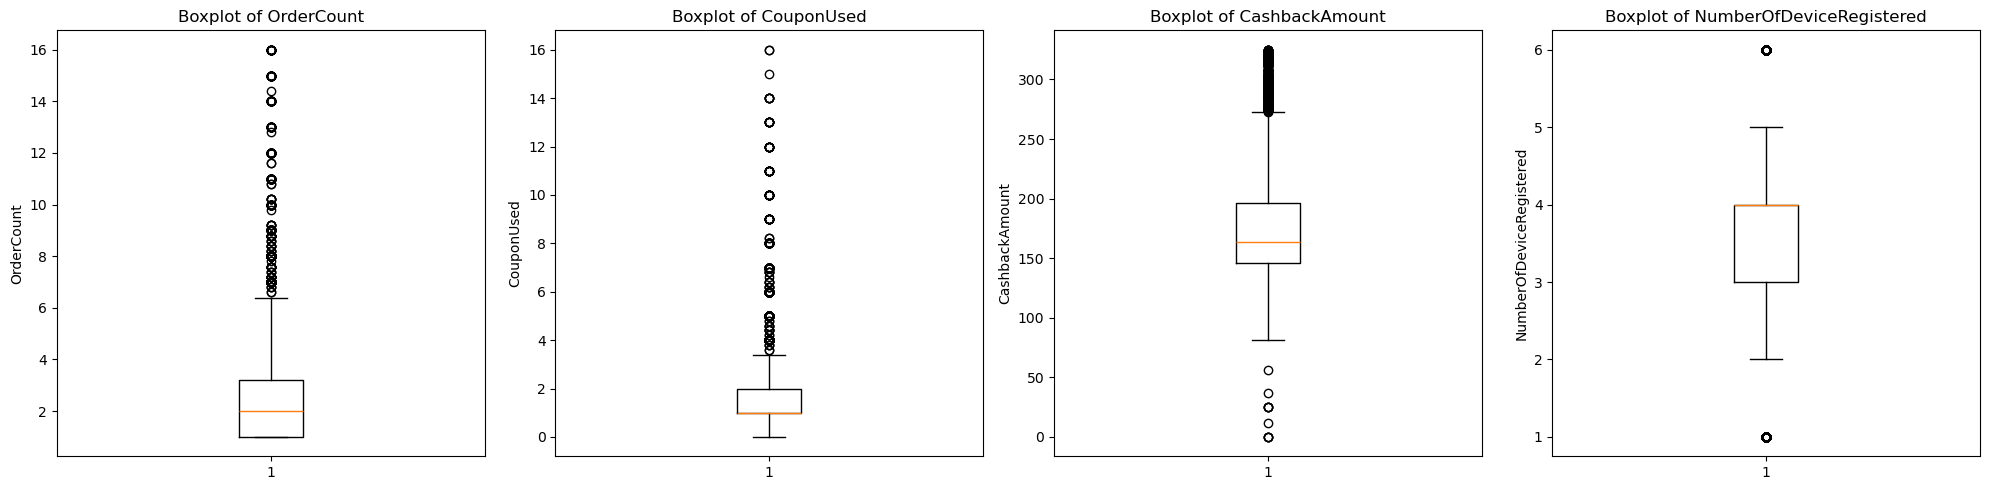

In [129]:
#Specify the exact names of your four numeric columns:
cols = [
    'OrderCount',
    'CouponUsed',
    'CashbackAmount',
    'NumberOfDeviceRegistered'
]

#Create a 1×4 grid of boxplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, col in zip(axes, cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

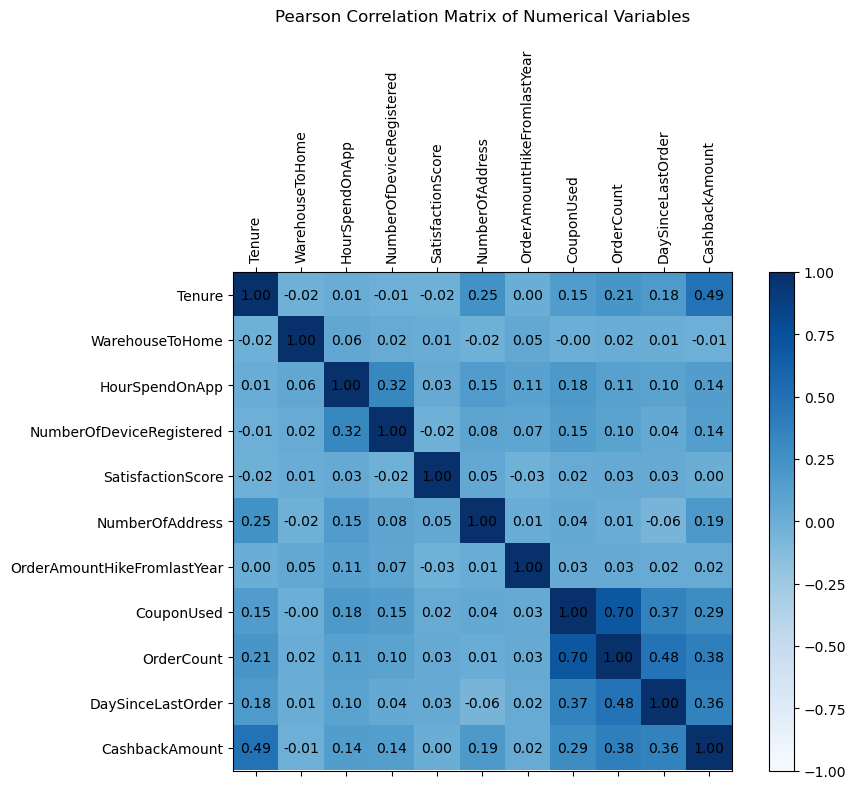

In [130]:
import matplotlib.pyplot as plt
import numpy as np

#Select numeric columns and drop 'Churn' if present
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn', errors='ignore')

#Compute Pearson correlation matrix
pearson_corr = df[num_cols].corr(method='pearson')

#Plot the correlation matrix with a Blues colormap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(pearson_corr, cmap='Blues', vmin=-1, vmax=1)
fig.colorbar(cax)

#Set tick labels
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90)
ax.set_yticklabels(num_cols)

#Annotate each cell with the correlation value formatted to two decimals
for (i, j), val in np.ndenumerate(pearson_corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

#Title and layout
ax.set_title("Pearson Correlation Matrix of Numerical Variables", pad=20)
plt.tight_layout()
plt.show()


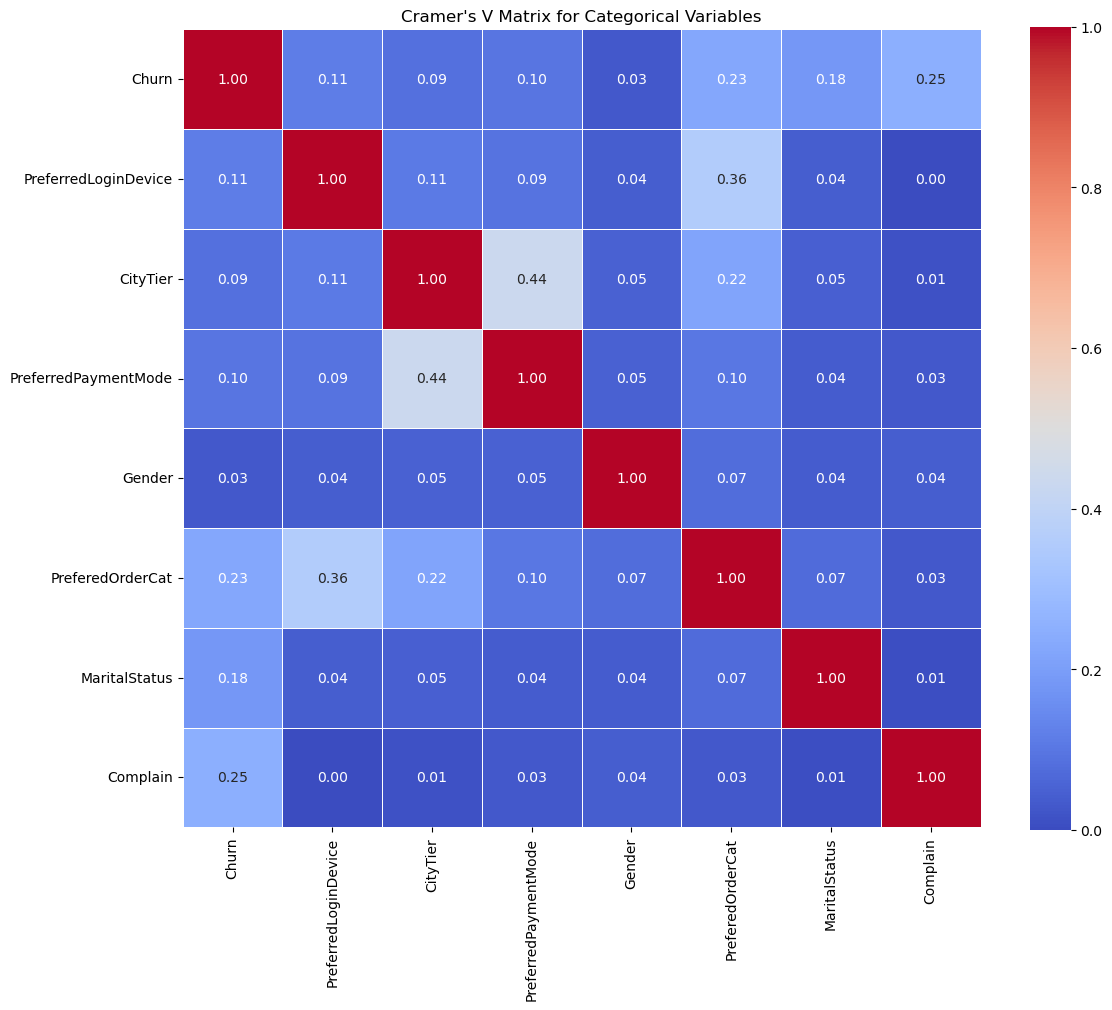

In [131]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

def cramers_v(x, y):
    """Compute Cramer's V statistic for two categorical pandas Series."""
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

#Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

#Build empty DataFrame to hold Cramer's V values
corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

#Fill in the matrix
for col1 in cat_cols:
    for col2 in cat_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

#Visualize as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix.astype(float),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title("Cramer's V Matrix for Categorical Variables")
plt.tight_layout()
plt.show()

In [132]:
import pandas as pd
from scipy.stats import pointbiserialr

# Ensure Churn is coded 0/1 as integer (keep this line)
df['Churn'] = df['Churn'].astype(int)

# 1. Select all numeric columns. Using 'number' is safer than listing every specific int type.
numeric_df = df.select_dtypes(include=['number'])

# 2. Drop 'Churn' from the selected columns. 
#    Use errors='ignore' so the code proceeds even if 'Churn' wasn't selected (e.g., if it was type 'object').
num_cols = numeric_df.columns.drop('Churn', errors='ignore') 
# ------------------

# Compute point‑biserial correlations
results = []
for col in num_cols:
    # Use the original DataFrame (df) for the correlation calculation
    r, p = pointbiserialr(df['Churn'], df[col])
    results.append({'variable': col, 'r_pb': r, 'p_value': p})

# Build a DataFrame and round for readability
pb_df = pd.DataFrame(results).set_index('variable')
pb_df = pb_df.round({'r_pb': 3, 'p_value': 4})

print("Point-Biserial Correlation with Churn:")
print(pb_df.sort_values('r_pb', key=lambda s: s.abs(), ascending=False))

Point-Biserial Correlation with Churn:
                              r_pb  p_value
variable                                   
Tenure                      -0.345   0.0000
CashbackAmount              -0.154   0.0000
DaySinceLastOrder           -0.148   0.0000
NumberOfDeviceRegistered     0.108   0.0000
SatisfactionScore            0.105   0.0000
WarehouseToHome              0.075   0.0000
NumberOfAddress              0.044   0.0010
OrderCount                  -0.037   0.0056
CouponUsed                  -0.015   0.2600
HourSpendOnApp               0.014   0.2809
OrderAmountHikeFromlastYear -0.009   0.5188


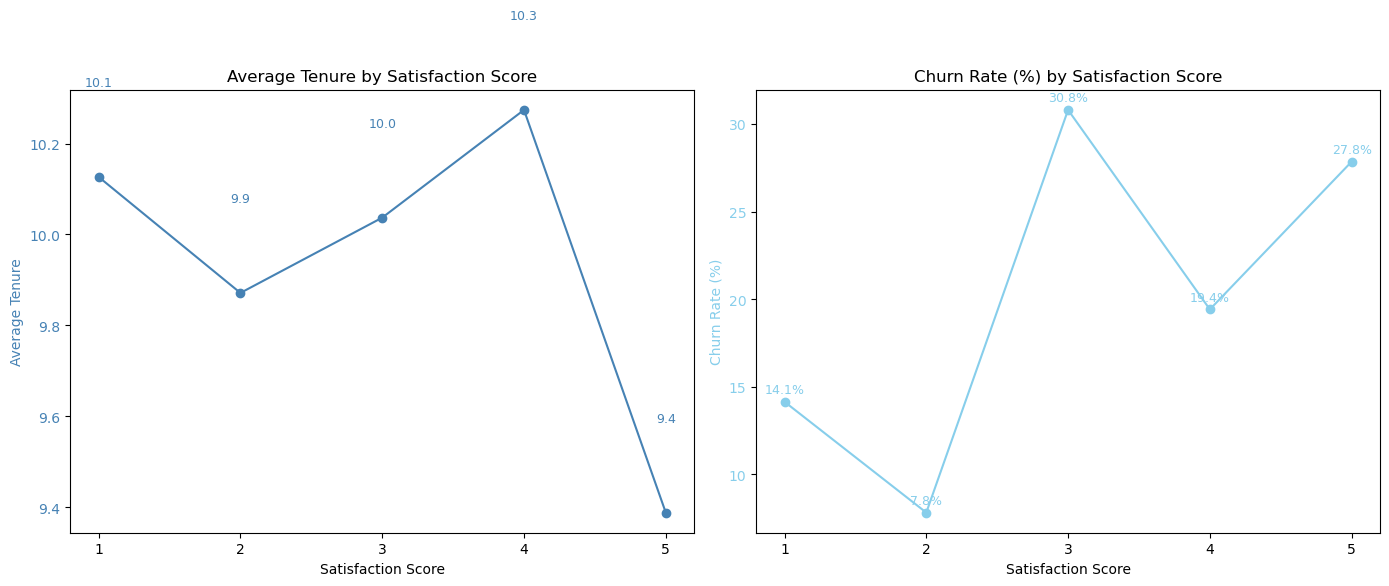

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average tenure by satisfaction score
avg_tenure = df.groupby("SatisfactionScore")["Tenure"].mean()

# Calculate churn distribution by satisfaction score
churn_counts = df[df["Churn"] == 1].groupby("SatisfactionScore")["Churn"].count()
churn_rate = (churn_counts / churn_counts.sum()) * 100  # % of churners

# Combine into one DataFrame for convenience
plot_df = pd.DataFrame({
    "AverageTenure": avg_tenure,
    "ChurnRatePct": churn_rate
}).reset_index()

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---- Left plot: Average Tenure ----
axes[0].plot(plot_df["SatisfactionScore"], plot_df["AverageTenure"],
             marker='o', color='steelblue', label="Average Tenure")

# Add data labels
for x, y in zip(plot_df["SatisfactionScore"], plot_df["AverageTenure"]):
    axes[0].text(x, y+0.2, f"{y:.1f}", ha='center', color='steelblue', fontsize=9)

axes[0].set_xlabel("Satisfaction Score")
axes[0].set_ylabel("Average Tenure", color='steelblue')
axes[0].tick_params(axis='y', labelcolor='steelblue')
axes[0].set_xticks([1,2,3,4,5])
axes[0].set_title("Average Tenure by Satisfaction Score")

# ---- Right plot: Churn Rate % ----
axes[1].plot(plot_df["SatisfactionScore"], plot_df["ChurnRatePct"],
             marker='o', color='skyblue', label="Churn Rate (%)")

# Add data labels
for x, y in zip(plot_df["SatisfactionScore"], plot_df["ChurnRatePct"]):
    axes[1].text(x, y+0.5, f"{y:.1f}%", ha='center', color='skyblue', fontsize=9)

axes[1].set_xlabel("Satisfaction Score")
axes[1].set_ylabel("Churn Rate (%)", color='skyblue')
axes[1].tick_params(axis='y', labelcolor='skyblue')
axes[1].set_xticks([1,2,3,4,5])
axes[1].set_title("Churn Rate (%) by Satisfaction Score")

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_22032\3970443883.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_tenure = df.groupby('Tenure_bins')['Churn'].mean().reset_index()


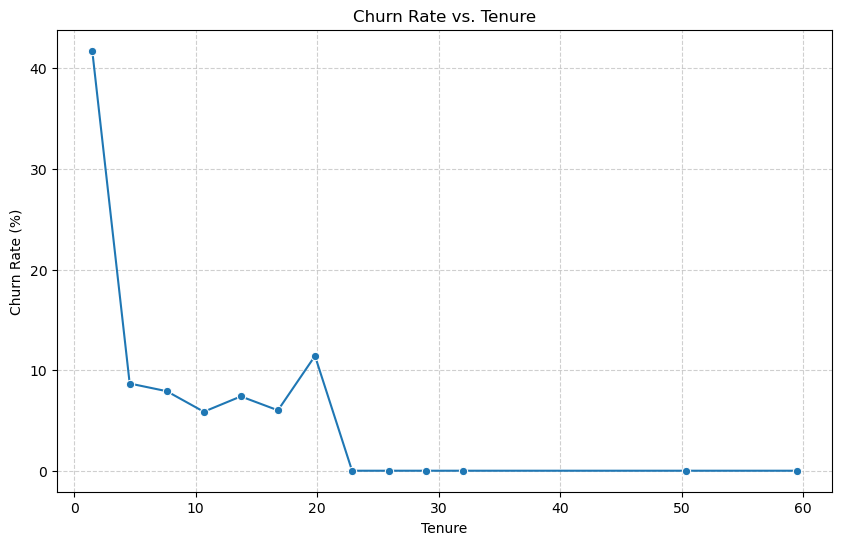

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by Tenure
# Bin tenure into intervals for a clearer trend
df['Tenure_bins'] = pd.cut(df['Tenure'], bins=20) # Adjust number of bins as needed
churn_rate_tenure = df.groupby('Tenure_bins')['Churn'].mean().reset_index()
churn_rate_tenure['Churn'] = churn_rate_tenure['Churn'] * 100 # Convert to percentage

# Get the midpoint of each bin for plotting
churn_rate_tenure['Tenure_midpoint'] = churn_rate_tenure['Tenure_bins'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure_midpoint', y='Churn', data=churn_rate_tenure, marker='o')
plt.title('Churn Rate vs. Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Drop the temporary bins column
df = df.drop(columns=['Tenure_bins'])

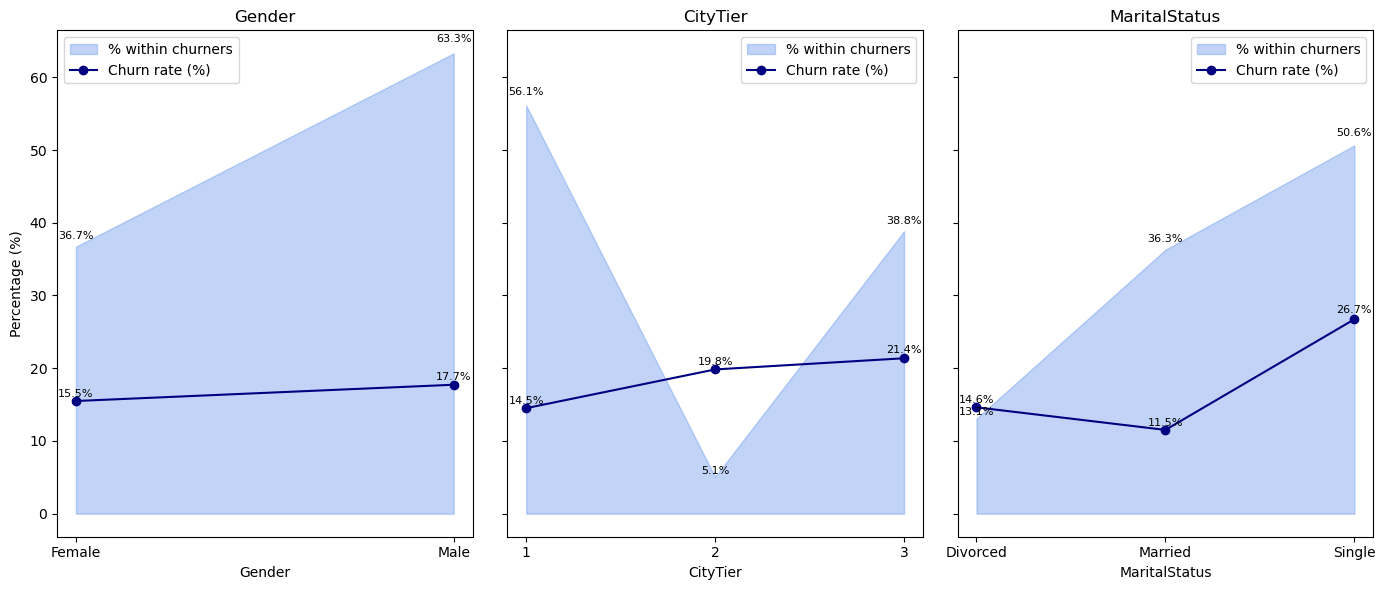

In [135]:
# Helper to compute stats
def compute_stats(df, group_col):
    grp = df.groupby(group_col)['Churn'].agg(
        total_count='count',
        churn_count='sum'
    )
    grp['churn_rate'] = grp['churn_count'] / grp['total_count'] * 100
    comp = (
        df[df['Churn'] == 1][group_col]
          .value_counts(normalize=True)
          .sort_index()
          * 100
    )
    return grp, comp

# Compute for each grouping
stats_gender, comp_gender = compute_stats(df, 'Gender')
stats_tier,   comp_tier   = compute_stats(df, 'CityTier')
stats_mstat,  comp_mstat  = compute_stats(df, 'MaritalStatus')

# Define CornflowerBlue area and Navy line
group_colors = {
    'Gender':        {'area': 'cornflowerblue', 'line': 'navy'},
    'CityTier':      {'area': 'cornflowerblue', 'line': 'navy'},
    'MaritalStatus': {'area': 'cornflowerblue', 'line': 'navy'}
}
# Plot combined area + line in 1×3 grid
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

for ax, stats, comp, title in zip(
    axes,
    [stats_gender, stats_tier, stats_mstat],
    [comp_gender,  comp_tier,  comp_mstat],
    ['Gender', 'CityTier', 'MaritalStatus']
):
    x = stats.index.astype(str)
    y_comp = comp.values
    y_rate = stats['churn_rate'].values

    colors = group_colors[title]

    # Filled area in CornflowerBlue
    ax.fill_between(
        x, y_comp,
        alpha=0.4,
        label='% within churners',
        color=colors['area']
    )
    # Line in Navy
    ax.plot(
        x, y_rate,
        marker='o', linestyle='-',
        label='Churn rate (%)',
        color=colors['line']
    )
    # Annotate both series
    for xi, yc, yr in zip(x, y_comp, y_rate):
        ax.text(xi, yc * 1.02, f"{yc:.1f}%", ha='center', va='bottom', fontsize=8)
        ax.text(xi, yr * 1.02, f"{yr:.1f}%", ha='center', va='bottom', fontsize=8)

    ax.set_title(title)
    ax.set_xlabel(title)
    ax.legend()

axes[0].set_ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

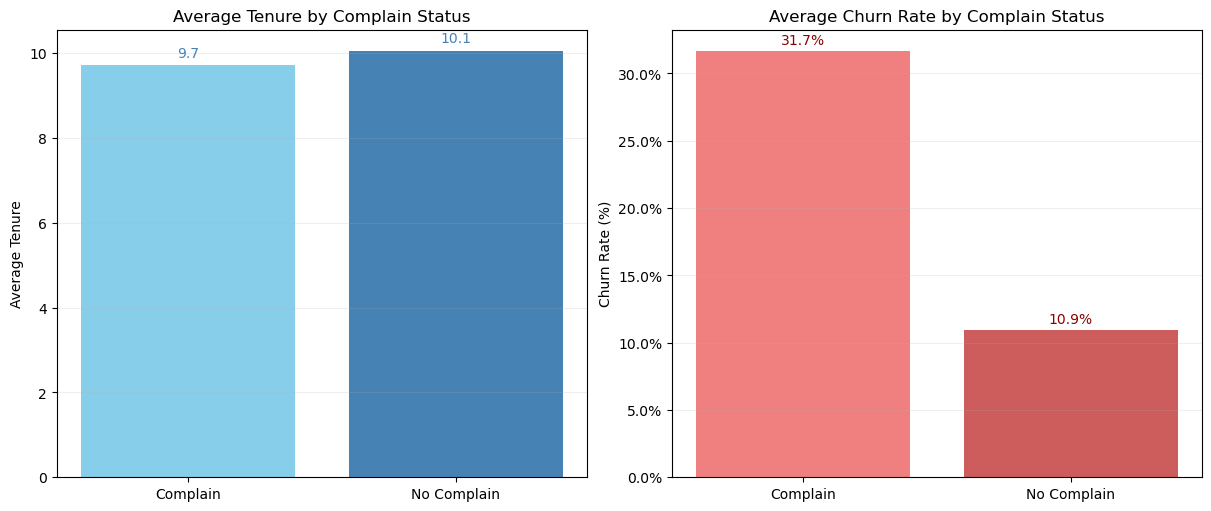

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter

# Map complain column for readability
df["Complain_Str"] = df["Complain"].map({0: "No Complain", 1: "Complain"})

# --- 1) Average Tenure by Complain ---
avg_tenure = df.groupby("Complain_Str")["Tenure"].mean().reset_index()

# --- 2) Average Churn Rate (%) by Complain ---
avg_churn = df.groupby("Complain_Str")["Churn"].mean().mul(100).reset_index()

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Left: Average Tenure
bars1 = axes[0].bar(avg_tenure["Complain_Str"], avg_tenure["Tenure"],
                    color=["skyblue", "steelblue"])
for bar in bars1:
    y = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, y + 0.2, f"{y:.1f}",
                 ha="center", fontsize=10, color="steelblue")
axes[0].set_title("Average Tenure by Complain Status")
axes[0].set_ylabel("Average Tenure")
axes[0].grid(axis="y", alpha=0.2)

# Right: Average Churn Rate
bars2 = axes[1].bar(avg_churn["Complain_Str"], avg_churn["Churn"],
                    color=["lightcoral", "indianred"])
for bar in bars2:
    y = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, y + 0.5, f"{y:.1f}%",
                 ha="center", fontsize=10, color="darkred")
axes[1].set_title("Average Churn Rate by Complain Status")
axes[1].set_ylabel("Churn Rate (%)")
axes[1].yaxis.set_major_formatter(PercentFormatter())
axes[1].grid(axis="y", alpha=0.2)

plt.show()

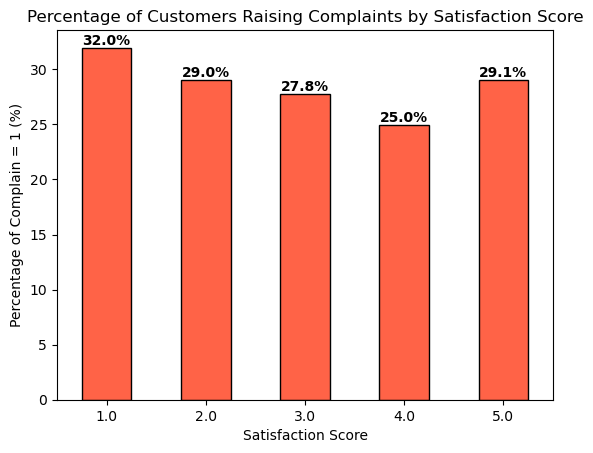

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by SatisfactionScore and calculate % of Complain = 1
complain_percent = (
    df.groupby('SatisfactionScore')['Complain']
      .mean() * 100   # proportion of 1's in percentage
)

# Plot
ax = complain_percent.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Percentage of Customers Raising Complaints by Satisfaction Score")
plt.xlabel("Satisfaction Score")
plt.ylabel("Percentage of Complain = 1 (%)")
plt.xticks(rotation=0)

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  # format to 1 decimal place
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_22032\1568449143.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bins).agg(


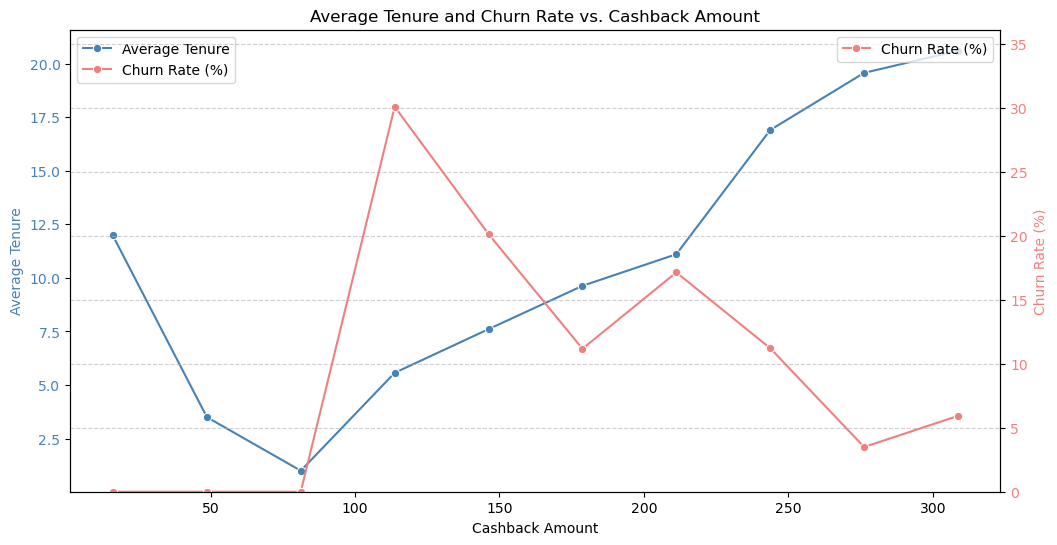

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bin CashbackAmount into intervals
bins = pd.cut(df['CashbackAmount'], bins=10)

# Group by bins and calculate average tenure and churn rate
grouped = df.groupby(bins).agg(
    AverageTenure=('Tenure', 'mean'),
    ChurnRate=('Churn', 'mean')
).reset_index()

# Convert churn rate to percentage
grouped['ChurnRate'] = grouped['ChurnRate'] * 100

# Get the midpoint of each bin for plotting
grouped['CashbackAmount_Midpoint'] = grouped['CashbackAmount'].apply(lambda x: x.mid)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Tenure on the first y-axis
sns.lineplot(x='CashbackAmount_Midpoint', y='AverageTenure', data=grouped, marker='o', ax=ax1, color='steelblue', label='Average Tenure')
ax1.set_xlabel('Cashback Amount')
ax1.set_ylabel('Average Tenure', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
# Create a second y-axis for Churn Rate
ax2 = ax1.twinx()
sns.lineplot(x='CashbackAmount_Midpoint', y='ChurnRate', data=grouped, marker='o', ax=ax2, color='lightcoral', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, grouped['ChurnRate'].max() * 1.2) # Adjust y-limit for better visualization

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Average Tenure and Churn Rate vs. Cashback Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_22032\475132380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CityTier', y='Tenure', data=avg_tenure_citytier, palette='viridis')


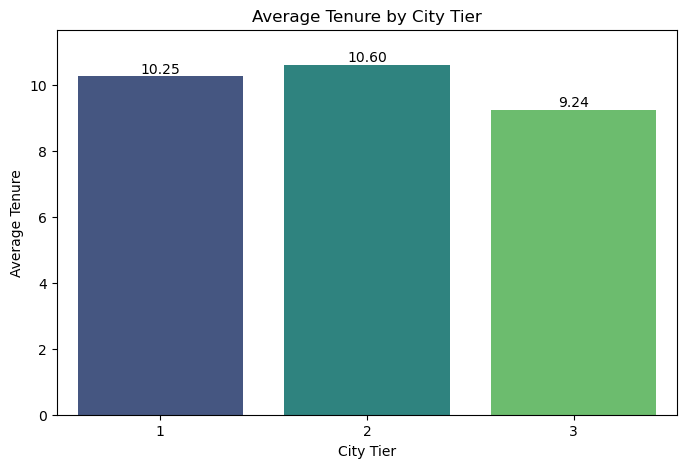

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average tenure by CityTier
avg_tenure_citytier = df.groupby('CityTier')['Tenure'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='CityTier', y='Tenure', data=avg_tenure_citytier, palette='viridis')
plt.title('Average Tenure by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Average Tenure')
plt.ylim(0, avg_tenure_citytier['Tenure'].max() * 1.1)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_22032\2709547380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='MaritalStatus', y='Tenure', data=avg_tenure_marital, palette='viridis')


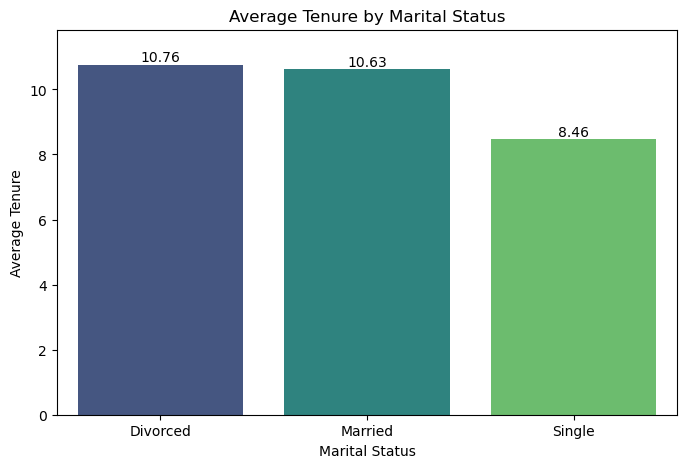

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average tenure by MaritalStatus
avg_tenure_marital = df.groupby('MaritalStatus')['Tenure'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='MaritalStatus', y='Tenure', data=avg_tenure_marital, palette='viridis')
plt.title('Average Tenure by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Tenure')
plt.ylim(0, avg_tenure_marital['Tenure'].max() * 1.1)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

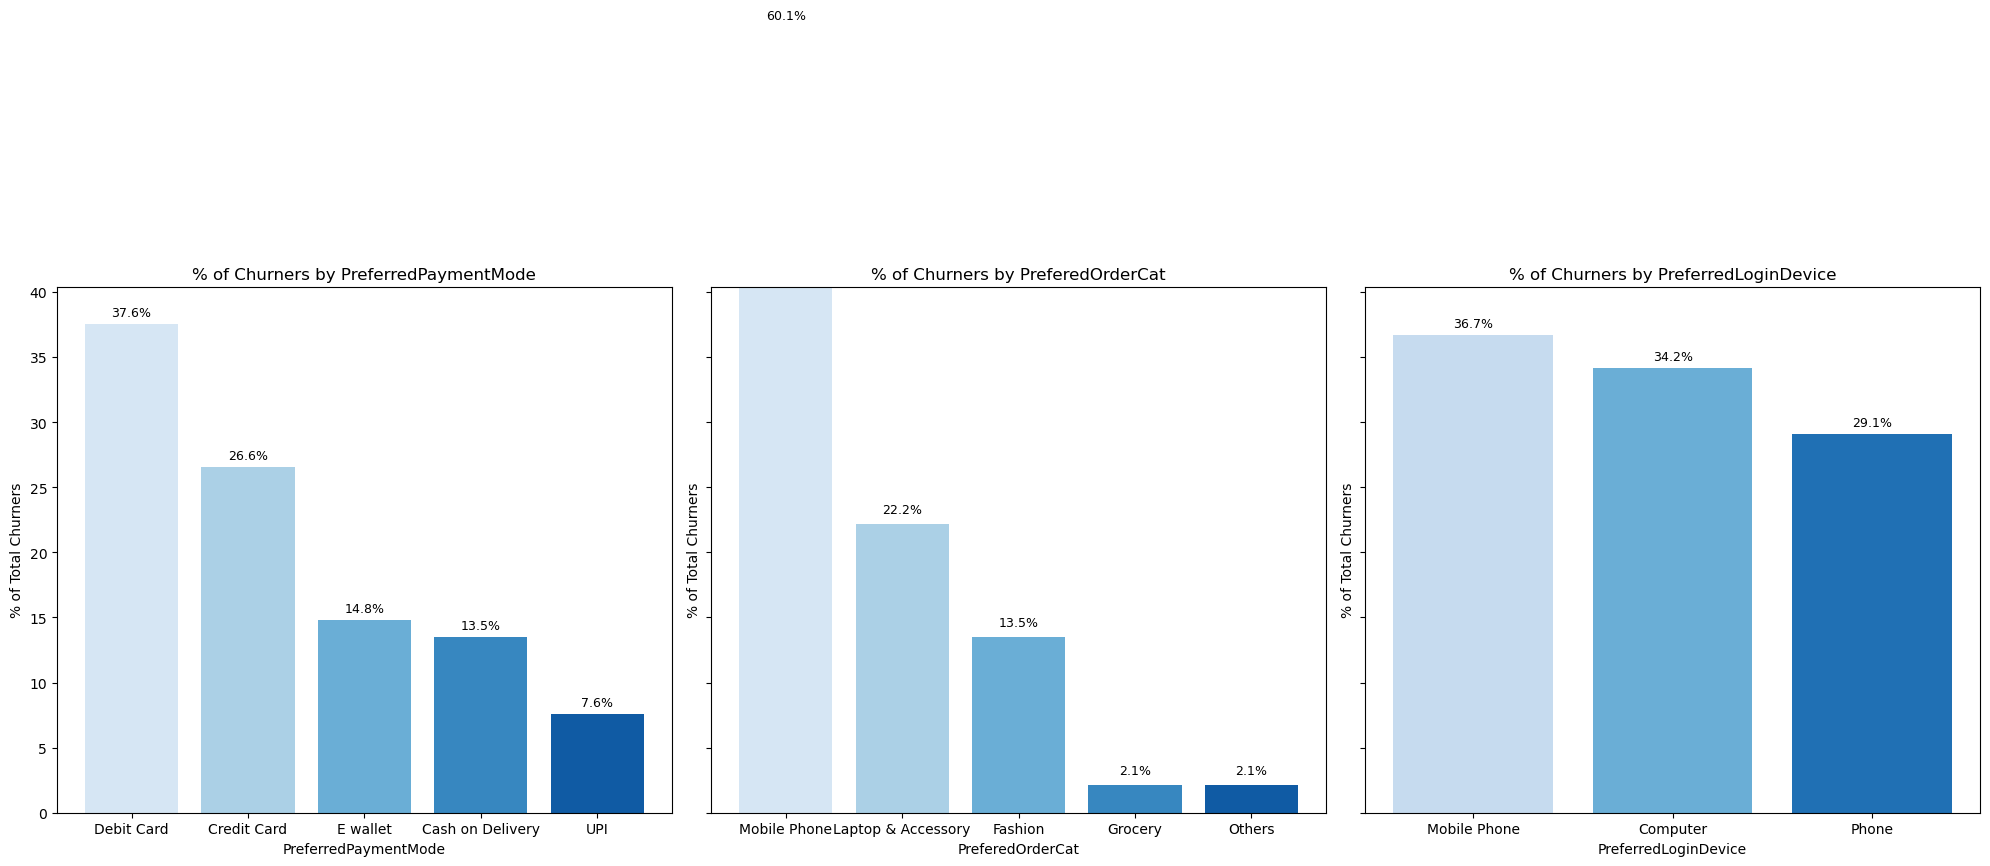

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical variables
cat_vars = ['PreferredPaymentMode', 'PreferedOrderCat', 'PreferredLoginDevice']

# Compute total number of churners
total_churn = df['Churn'].sum()

# Prepare the figure with one subplot per variable
fig, axes = plt.subplots(1, len(cat_vars), figsize=(20, 10), sharey=True)

for ax, var in zip(axes, cat_vars):
    # Count churners per category level
    churn_counts = df[df['Churn'] == 1].groupby(var).size()
    # Compute percentage of total churners
    pct_churn = (churn_counts / total_churn * 100).sort_values(ascending=False)

    # Generate a blue color palette (one shade per bar)
    colors = sns.color_palette('Blues', n_colors=len(pct_churn))

    # Plot with Matplotlib’s bar (no seaborn palette warning)
    ax.bar(pct_churn.index, pct_churn.values, color=colors)
    ax.set_title(f'% of Churners by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('% of Total Churners')
    ax.set_ylim(0, pct_churn.max() * 1.1)

    # Annotate each bar with its percentage
    for i, v in enumerate(pct_churn.values):
        ax.text(i, v + pct_churn.max()*0.01, f'{v:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

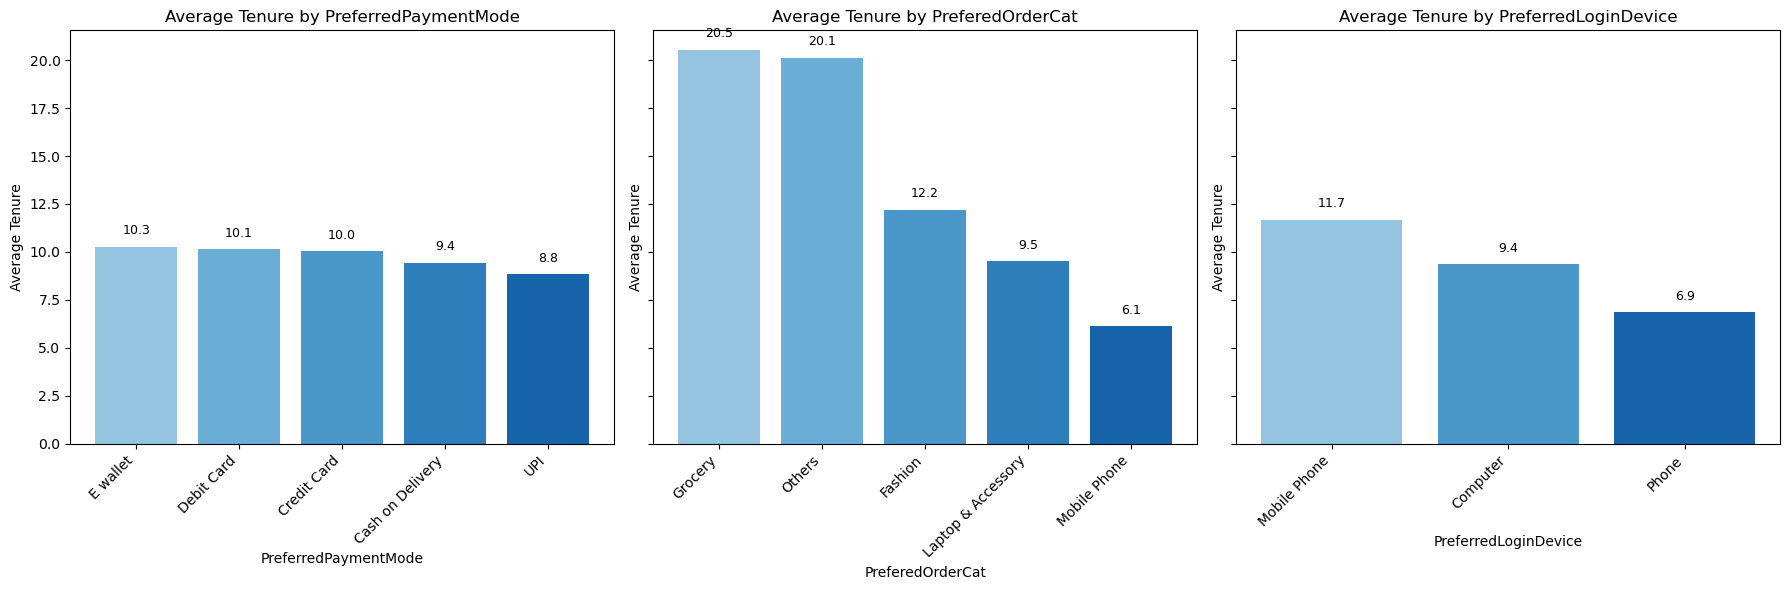

In [142]:
# Define categorical variables and select needed columns
cat_vars = ['PreferredPaymentMode', 'PreferedOrderCat', 'PreferredLoginDevice']
df_clean = df[cat_vars + ['Tenure']].dropna()

# Prepare subplots
fig, axes = plt.subplots(1, len(cat_vars), figsize=(18, 6), sharey=True)

# Compute and plot average Tenure for each category with a Blues colormap
for ax, var in zip(axes, cat_vars):
    avg_tenure = (
        df_clean
        .groupby(var)['Tenure']
        .mean()
        .sort_values(ascending=False)
    )

    x = range(len(avg_tenure))
    # generate a Blues-based color list
    colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(avg_tenure)))

    ax.bar(x, avg_tenure.values, color=colors)

    # Set ticks and labels explicitly
    ax.set_xticks(x)
    ax.set_xticklabels(avg_tenure.index, rotation=45, ha='right')

    ax.set_title(f'Average Tenure by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Average Tenure')

    # Annotate bars with mean values
    for i, v in enumerate(avg_tenure.values):
        ax.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

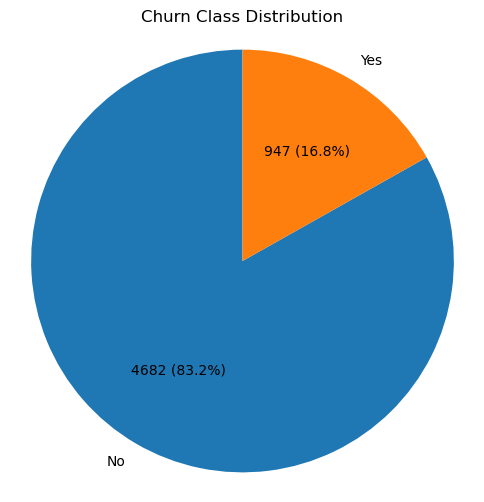

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Compute counts and labels
counts = df['Churn'].value_counts().sort_index()
labels = ['No', 'Yes']
values = counts.values
total = values.sum()

# Helper to show “count (xx.x%)”
def fmt_autopct(pct):
    count = int(pct/100. * total)
    return f"{count} ({pct:.1f}%)"

# Plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct=fmt_autopct,
    startangle=90
)
plt.title('Churn Class Distribution')
plt.axis('equal')  # ensures the pie is circular
plt.show()

In [144]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical/object columns (include bool if needed)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize encoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert encoded array back to DataFrame with proper column names
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Drop original categorical columns and join encoded columns
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [145]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Ensure target is numeric (0/1)
df['Churn'] = df['Churn'].astype(int)

# If you've already one-hot encoded categoricals, X is fully numeric
X = df.drop(columns=['Churn'])
y = df['Churn']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before oversampling - Train class distribution:")
print(y_train.value_counts(), "\n")

def random_oversample(X_tr: pd.DataFrame, y_tr: pd.Series, random_state: int = 42):
    """Randomly oversample minority class to match majority count (binary)."""
    tmp = X_tr.copy()
    tmp['__target__'] = y_tr.values
    max_count = tmp['__target__'].value_counts().max()
    parts = []
    for cls, grp in tmp.groupby('__target__'):
        parts.append(grp.sample(n=max_count, replace=True, random_state=random_state))
    res = pd.concat(parts).sample(frac=1, random_state=random_state).reset_index(drop=True)

    y_res = res['__target__'].astype(y_tr.dtype)
    X_res = res.drop(columns='__target__')
    return X_res, y_res

# Oversample ONLY the training set
X_train_res, y_train_res = random_oversample(X_train, y_train, random_state=42)

print("After oversampling - Train class distribution:")
print(y_train_res.value_counts(), "\n")

# Keep test set untouched
print("Test set class distribution:")
print(y_test.value_counts())

Before oversampling - Train class distribution:
Churn
0    3746
1     758
Name: count, dtype: int64 

After oversampling - Train class distribution:
__target__
0    3746
1    3746
Name: count, dtype: int64 

Test set class distribution:
Churn
0    936
1    190
Name: count, dtype: int64


In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

# --- Pipeline: scaling -> RF ---
rf_pipe = Pipeline(steps=[
    ("scaler", RobustScaler()),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# --- Param grid (with rf__ prefix) ---
rf_param_grid = {
    'rf__n_estimators':      [100, 200,300],
    'rf__max_depth':         [4, 8],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf':  [1, 2, 5],
    'rf__max_features':      ['sqrt', 'log2']
}

# --- CV setup ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# --- Grid search on Random-resampled training set ---
grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train_res, y_train_res)

print("Best params:", grid.best_params_)
print("Best CV PR AUC:", grid.best_score_)

# --- Best estimator ---
best_rf = grid.best_estimator_

# --- Evaluate on untouched test set ---
y_prob = best_rf.predict_proba(X_test)[:, 1]
y_pred = best_rf.predict(X_test)

print("Test PR AUC:", average_precision_score(y_test, y_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

Best params: {'rf__max_depth': 8, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Best CV PR AUC: 0.983740098383663
Test PR AUC: 0.8539827070470519
Test ROC AUC: 0.9654239766081871
              precision    recall  f1-score   support

           0      0.975     0.900     0.936       936
           1      0.641     0.884     0.743       190

    accuracy                          0.897      1126
   macro avg      0.808     0.892     0.839      1126
weighted avg      0.918     0.897     0.903      1126



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Use your tuned RF model
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="roc_auc"
)

# Mean across folds
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)
# Plot
plt.plot(train_sizes, train_mean, 'o-', label="Training")
plt.plot(train_sizes, test_mean, 's-', label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("PR AUC (average precision)")
plt.title("Random Forest Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Probabilities and predictions
y_prob = best_rf.predict_proba(X_test)[:, 1]
y_pred = best_rf.predict(X_test)

# Metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print(f"[Random Forest] Accuracy:   {accuracy:.4f}")
print(f"[Random Forest] Precision:  {precision:.4f}")
print(f"[Random Forest] Recall:     {recall:.4f}")
print(f"[Random Forest] F1 Score:   {f1:.4f}")
print(f"[Random Forest] ROC AUC:    {roc_auc:.4f}")

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

#Support Vector Machines Pipeline
svm_pipe = Pipeline(steps=[
    ("scaler", RobustScaler()),
    ("svm_clf", SVC(random_state=42, probability=True))
])

# Hyper Parameter Tuning
param_grid_svm = [
    {
        "svm_clf__kernel": ["linear"],
        "svm_clf__C": [0.01, 0.03, 0.10, 0.30],
    },
    {
        "svm_clf__kernel": ["rbf"],
        "svm_clf__C": [0.01, 0.03, 0.10, 0.30],
        "svm_clf__gamma": ["scale", 0.0005, 0.0010, 0.0030],
    }
]

# CV & grid search on (re)sampled training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid_svm,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0
)

svm_grid.fit(X_train_res, y_train_res)

print("Best params:", svm_grid.best_params_)
print("Best CV ROC AUC:", svm_grid.best_score_)  # fixed label

best_svm = svm_grid.best_estimator_

# --- Evaluate on untouched test set ---
y_prob = best_svm.predict_proba(X_test)[:, 1]
y_pred = best_svm.predict(X_test)

print("Test PR AUC:", average_precision_score(y_test, y_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_svm,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="roc_auc"
)

train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training")
plt.plot(train_sizes, test_mean, 's-', label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("PR AUC (average precision)")
plt.title("SVM Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Probabilities and predictions
y_prob = best_svm.predict_proba(X_test)[:, 1]
y_pred = best_svm.predict(X_test)

# Metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print(f"[SVM] Accuracy:   {accuracy:.4f}")
print(f"[SVM] Precision:  {precision:.4f}")
print(f"[SVM] Recall:     {recall:.4f}")
print(f"[SVM] F1 Score:   {f1:.4f}")
print(f"[SVM] ROC AUC:    {roc_auc:.4f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# --- Pipeline
gb_pipe = Pipeline(steps=[
    ("gb_clf", GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    "gb_clf__learning_rate":     [0.05, 0.03],
    "gb_clf__n_estimators":      [200, 300, 400],
    "gb_clf__max_depth":         [3, 4],
    "gb_clf__max_leaf_nodes":    [6, 8],
    "gb_clf__min_samples_leaf":  [10, 15],
    "gb_clf__min_samples_split": [20, 40]
}
# --- CV setup & grid search on resampled training data ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gb_grid = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid_gb,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0
)

gb_grid.fit(X_train_res, y_train_res)

print("Best params:", gb_grid.best_params_)
print("Best CV PR AUC:", gb_grid.best_score_)

# --- Best estimator ---
best_gb = gb_grid.best_estimator_

# --- Evaluate on untouched test set ---
y_prob = best_gb.predict_proba(X_test)[:, 1]
y_pred = best_gb.predict(X_test)

print("Test PR AUC:", average_precision_score(y_test, y_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
# Learning curve Gradient Boosting Model
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_gb,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="roc_auc"
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1),  's-', label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("PR AUC (average precision)")
plt.title("Gradient Boosting Learning Curve")
plt.legend();
plt.grid(True);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Probabilities and predictions for GB ---
y_prob = best_gb.predict_proba(X_test)[:, 1]
y_pred = best_gb.predict(X_test)

# --- Metrics ---
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print(f"[Gradient Boosting] Accuracy:   {accuracy:.4f}")
print(f"[Gradient Boosting] Precision:  {precision:.4f}")
print(f"[Gradient Boosting] Recall:     {recall:.4f}")
print(f"[Gradient Boosting] F1 Score:   {f1:.4f}")
print(f"[Gradient Boosting] ROC AUC:    {roc_auc:.4f}")

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

# Pipeline with step name 'xgb_clf' to match the grid
xgb_pipe = Pipeline(steps=[
    ("xgb_clf", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist"
    ))
])

param_grid_xgb = {
    'xgb_clf__learning_rate':    [0.02, 0.05],
    'xgb_clf__n_estimators':     [400, 800],
    'xgb_clf__max_depth':        [3, 4],
    'xgb_clf__min_child_weight': [5, 8],
    'xgb_clf__gamma':            [0.2, 0.5],
    'xgb_clf__subsample':        [0.7, 0.9],
    'xgb_clf__colsample_bytree': [0.6, 0.8],
    'xgb_clf__reg_alpha':        [0.0, 0.1],
    'xgb_clf__reg_lambda':       [1.0, 3.0],
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0
)

# Train on Random-resampled training data
xgb_grid.fit(X_train_res, y_train_res)

print("Best params:", xgb_grid.best_params_)
print("Best CV PR AUC:", xgb_grid.best_score_)

best_xgb = xgb_grid.best_estimator_
# Evaluate on untouched test set
y_prob = best_xgb.predict_proba(X_test)[:, 1]
y_pred = best_xgb.predict(X_test)

print("Test PR AUC:", average_precision_score(y_test, y_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_xgb,         # from the grid above
    X=X_train,                  # original (pre-RandomSampling) split recommended
    y=y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="roc_auc"
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1),  's-', label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("PR AUC (average precision)")
plt.title("XGBoost Learning Curve")
plt.legend();
plt.grid(True);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# --- Probabilities and predictions for XGB ---
y_prob = best_xgb.predict_proba(X_test)[:, 1]
y_pred = best_xgb.predict(X_test)

# --- Metrics ---
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)


print(f"[XGBoost] Accuracy:   {accuracy:.4f}")
print(f"[XGBoost] Precision:  {precision:.4f}")
print(f"[XGBoost] Recall:     {recall:.4f}")
print(f"[XGBoost] F1 Score:   {f1:.4f}")
print(f"[XGBoost] ROC AUC:    {roc_auc:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas for learning_curve plotting

# List of trained models and their names
models = {
    "Random Forest": best_rf,
    "SVM": best_svm,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}

fig, axes = plt.subplots(4, 3, figsize=(18, 24))

for i, (name, model) in enumerate(models.items()):
    # Predictions and probabilities on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i, 0], cmap='Blues')
    axes[i, 0].set_title(f'{name}\nConfusion Matrix')
 # --- ROC Curve ---
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    axes[i, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[i, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i, 1].set_xlim([0.0, 1.0])
    axes[i, 1].set_ylim([0.0, 1.05])
    axes[i, 1].set_xlabel('False Positive Rate')
    axes[i, 1].set_ylabel('True Positive Rate')
    axes[i, 1].set_title(f'{name}\nROC Curve')
    axes[i, 1].legend(loc="lower right")
    axes[i, 1].grid(True)

    # --- Learning Curve ---
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train, # Use original training data (pre-RandomBalancing) for learning curve
        y=y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Use stratified k-fold for imbalanced data
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 6),
        scoring="roc_auc" # or other relevant metric like 'average_precision'
    )
    train_mean = train_scores.mean(axis=1)
    test_mean  = test_scores.mean(axis=1)

    axes[i, 2].plot(train_sizes, train_mean, 'o-', label="Training")
    axes[i, 2].plot(train_sizes, test_mean,  's-', label="Cross-validation")
    axes[i, 2].set_xlabel("Training examples")
    axes[i, 2].set_ylabel("Score (ROC AUC)") # Update label based on scoring
    axes[i, 2].set_title(f'{name}\nLearning Curve')
    axes[i, 2].legend(loc="lower right")
    axes[i, 2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to get metrics for a given model
def get_metrics(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    return {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Get metrics for each model
metrics_rf = get_metrics(best_rf, X_test, y_test, "Random Forest")
metrics_svm = get_metrics(best_svm, X_test, y_test, "SVM")
metrics_gb = get_metrics(best_gb, X_test, y_test, "Gradient Boosting")
metrics_xgb = get_metrics(best_xgb, X_test, y_test, "XGBoost")

# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame([metrics_rf, metrics_svm, metrics_gb, metrics_xgb])

# Display the comparison table, rounded to 4 decimal places
print("Model Performance Comparison:")
display(metrics_df.round(4))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# metrics_df already exists
plot_df = metrics_df.copy()

# Ensure order of models
model_order = ["Random Forest", "SVM", "Gradient Boosting", "XGBoost"]
plot_df = plot_df.set_index("Model").loc[model_order].reset_index()

# Convert all metrics to float
metric_cols = [c for c in plot_df.columns if c != "Model"]
plot_df[metric_cols] = plot_df[metric_cols].astype(float)

# Bar metrics vs line metric
bar_metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
line_metric = "F1 Score"

x = np.arange(len(plot_df["Model"]))  # model positions
width = 0.2  # bar width

plt.figure(figsize=(14, 8))

# Use pastel palette for bars
pastel_colors = sns.color_palette("pastel", len(bar_metrics))
# Plot each bar metric
for i, (m, color) in enumerate(zip(bar_metrics, pastel_colors)):
    vals = plot_df[m].values * 100  # convert to percentage
    bar_positions = x + (i - len(bar_metrics)/2)*width + width/2
    bars = plt.bar(bar_positions, vals, width=width, color=color, edgecolor="gray")

    # Annotate bars: metric name at bottom, value at top
    for bar, v in zip(bars, vals):
        # Metric name at bottom
        plt.text(bar.get_x() + bar.get_width()/2, 2,  # just above baseline
                 f"{m}", ha="center", va="bottom", fontsize=7, color="black", rotation=90)
        # Value at top
        plt.text(bar.get_x() + bar.get_width()/2, v + 1,
                 f"{v:.1f}%", ha="center", va="bottom", fontsize=8, color="black")

# Plot F1 Score as a line
f1_vals = plot_df[line_metric].values * 100
plt.plot(x, f1_vals, marker="o", color="black", linewidth=2)

# Annotate line points
for xi, v in zip(x, f1_vals):
    plt.text(xi, v + 2, f"{line_metric}\n{v:.1f}%",
             ha="center", va="bottom", fontsize=7, color="black")
    # Axis labels and formatting
plt.xticks(x, plot_df["Model"], rotation=0, ha="center", fontsize=11)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.ylim(0, 115)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List of trained models and their names (assuming these are already defined)
models = {
    "Random Forest": best_rf,
    "SVM": best_svm,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get probabilities for the positive class (churn = 1)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else: # For models like SVC with probability=True
        y_prob = model.decision_function(X_test)

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming best_xgb and X_test, y_test are already defined
# Get predictions for the XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'best_xgb' is your trained XGBoost pipeline
# Extract the XGBoost model from the pipeline
xgb_model = best_xgb.named_steps['xgb_clf']

# Get feature importances
feature_importances = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for better visualization and sorting
feat_imp = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
})

# Sort by importance and select top 10
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(10)

# Display the table
print("Top 10 XGBoost Feature Importances (Gain):")
display(feat_imp)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_imp,
    hue='Feature',        # assign hue
    dodge=False,
    palette='viridis'
)

# Remove the legend
ax.legend_.remove()

plt.title('Top 10 XGBoost Feature Importance (Gain)')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
import shap

# Make sure we use the fitted XGBClassifier
xgb_model = best_xgb.named_steps["xgb_clf"]

# Use a TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)

In [ ]:
# --- Detailed Summary (Bee swarm plot) ---
shap.summary_plot(shap_values, X_test)


In [ ]:
import shap
import matplotlib.pyplot as plt

# Create the force plot
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test.iloc[0, :],
    matplotlib=True,
    show=False   # prevent auto-show so we can modify before displaying
)

ax = plt.gca()

# Loop through all text objects and reduce only the feature labels
for txt in ax.findobj(match=plt.Text):
    if "=" in txt.get_text():   # only target feature labels
        txt.set_fontsize(8)

plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming 'best_xgb' and 'X_test' are already defined
# Extract the XGBoost model from the pipeline
xgb_model = best_xgb.named_steps["xgb_clf"]

# Use a TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for test set if not already computed
# This can be time-consuming, so only run if shap_values is not in the environment
try:
    shap_values
except NameError:
    print("SHAP values not found, computing now...")
    shap_values = explainer.shap_values(X_test)
    print("SHAP values computed.")
    # List of features for dependence plots
features_to_plot = [
    'Tenure',
    'Complain_1',
    'SatisfactionScore',
    'NumberOfAddress',
    'CashbackAmount'
]

# Generate dependence plots for each feature
for feature in features_to_plot:
    print(f"Generating SHAP dependence plot for: {feature}")
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None, alpha=0.5)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt



# Positive class index for churn = 1
CLS_IDX = 1

def _normalize_expected_value(explainer, cls_idx=CLS_IDX):
    """
    Return a scalar base value consistent with the SHAP values
    for binary or multiclass explainers.
    """
    raw = explainer.expected_value
    # Convert lists to ndarray and squeeze length-1 arrays
    if isinstance(raw, (list, np.ndarray)):
        raw = np.array(raw).squeeze()
        if isinstance(raw, np.ndarray):
        if raw.ndim == 0:
            return float(raw)           # scalar in ndarray wrapper
        if raw.ndim == 1 and len(raw) == 1:
            return float(raw[0])        # length-1 vector
        if raw.ndim == 1 and len(raw) >= 2:
            return float(raw[cls_idx])  # multiclass vector
        raise ValueError(f"Unexpected expected_value shape: {raw.shape}")
    else:
        # Plain scalar (common for binary)
        return float(raw)

def _get_sv_for_index(shap_values, i, cls_idx=CLS_IDX):
    """
    Return a 1D array of SHAP values for row i.
    - If shap_values is a list: pick the class array.
    - If it's a single array: use it directly.
    """
    if isinstance(shap_values, list):
        sv = shap_values[cls_idx]
        return sv[i, :]
    else:
        return shap_values[i, :]
        def plot_waterfall_for_customer(i, label, X_test, shap_values, base_val):
    """
    Build a shap.Explanation and draw a waterfall plot for row i.
    """
    sv_row = _get_sv_for_index(shap_values, i, cls_idx=CLS_IDX)

    exp = shap.Explanation(
        values=sv_row,
        base_values=base_val,
        data=X_test.iloc[i, :].values,
        feature_names=X_test.columns.tolist()
    )

    shap.plots.waterfall(exp, show=False)
    plt.title(f"SHAP Waterfall — Customer at position {i} (Churn={label})")
    plt.tight_layout()
    plt.show()
    # ----------------- Select indices safely -----------------
# Ensure y_test is a pandas Series aligned to X_test
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, index=X_test.index)  # assume same order/length
else:
    # Align y_test index to X_test (preserves X_test order)
    y_test = y_test.reindex(X_test.index)

# Find positions (integer locations) for churners and non-churners
labels = y_test.values  # numpy array aligned to X_test rows
pos_churn_idxs = np.where(labels == 1)[0]
pos_nonchurn_idxs = np.where(labels == 0)[0]

# ----------------- Compute base value -----------------
base_val = _normalize_expected_value(explainer, cls_idx=CLS_IDX)

# ----------------- Generate the plots -----------------
# One churner
if pos_churn_idxs.size > 0:
    i_churn = int(pos_churn_idxs[0])
    print("Waterfall for a customer who churned:")
    plot_waterfall_for_customer(i_churn, label=1, X_test=X_test, shap_values=shap_values, base_val=base_val)
else:
    print("No churners in the aligned test set.")
    # One non-churner
if pos_nonchurn_idxs.size > 0:
    i_nonchurn = int(pos_nonchurn_idxs[0])
    print("\nWaterfall for a customer who did not churn:")
    plot_waterfall_for_customer(i_nonchurn, label=0, X_test=X_test, shap_values=shap_values, base_val=base_val)
else:
    print("No non-churners in the aligned test set.")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare features (drop Churn if present)
X_all = df.drop(columns=['Churn'], errors='ignore').select_dtypes(include=[np.number])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Force k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
segments = kmeans.fit_predict(X_scaled)
# Add segment column to df
df['segment'] = segments

# Report quality metrics
wss = kmeans.inertia_
sil = silhouette_score(X_scaled, segments)
print(f"K-Means (k={k}) — WSS/Inertia: {wss:,.2f} | Silhouette: {sil:.4f}")
print("\nSegment sizes:")
print(df['segment'].value_counts().sort_index())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_all is a DataFrame and align its index with df
X_all_aligned = X_all.copy()
X_all_aligned.index = df.index

# Add predicted churn from the best XGBoost Model to the original dataframe
# Make sure the order of predictions matches the original dataframe index
df['PredictedChurn'] = best_xgb.predict(X_all_aligned)

# Summarize segments with number of customers and respective churn rates
segment_summary = df.groupby('segment').agg(
    PredictedChurnRate=('PredictedChurn', 'mean'),
    CustomerCount=('segment', 'count')
).reset_index()
segment_summary['PredictedChurnRate'] = segment_summary['PredictedChurnRate'] * 100

print("Segment Summary (Based on Predicted Churn):")
display(segment_summary)

# Plot Segment vs Predicted Churn Rate
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='segment', y='PredictedChurnRate', data=segment_summary, palette='viridis')
plt.title('Predicted Churn Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Predicted Churn Rate (%)')
plt.ylim(0, segment_summary['PredictedChurnRate'].max() * 1.1)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.show()

In [ ]:
# Analyze segment characteristics
segment_characteristics = df.groupby('segment').agg(
    AverageTenure=('Tenure', 'mean'),
    AverageCashbackAmount=('CashbackAmount', 'mean'),
    MaritalStatus_Single_Count=('MaritalStatus_Single', 'sum'),
    CityTier_3_Count=('CityTier_3', 'sum'),
    Complain_1_Count=('Complain_1', 'sum'),
    CustomerCount=('segment', 'count'), # Include customer count for context
    ChurnRate=('PredictedChurn', 'mean') # Add churn rate
).reset_index()

# Convert ChurnRate to percentage
segment_characteristics['ChurnRate'] = segment_characteristics['ChurnRate'] * 100


print("\nSegment Characteristics:")
display(segment_characteristics)